In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import dataset
train = pd.read_csv('Train_UWu5bXk.csv')
test = pd.read_csv('Test_u94Q5KV.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#Combining dataset
train['source'] = 'train'
test['source'] = 'test'
dataset = pd.concat([train,test],ignore_index = True,sort=True)
print(dataset.shape)


(14204, 13)


In [4]:
dataset.head(10)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,train
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1,train
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,NaN,Supermarket Type1,train
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,NaN,Supermarket Type1,train


In [5]:
#Checking which columns have null values
dataset.apply(lambda x:sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [6]:
#Checking statistics for numerical
dataset.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [7]:
#Check for categorical variables
dataset.apply(lambda x:len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

In [8]:
#Imputing missing values
dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean(),inplace = True)
sum(dataset['Item_Weight'].isnull())

0

In [9]:
dataset.Outlet_Size.value_counts(dropna = False)

Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Outlet_Type        Outlet_Size
Grocery Store      NaN             925
                   Small           880
Supermarket Type1  Small          3100
                   NaN            3091
                   High           1553
                   Medium         1550
Supermarket Type2  Medium         1546
Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

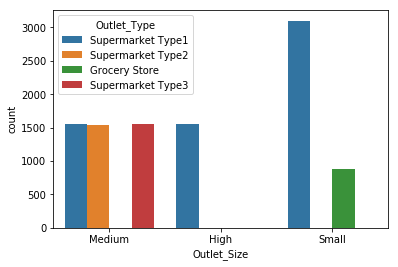

In [10]:
sns.countplot(x = 'Outlet_Size',hue = 'Outlet_Type', data = dataset)
dataset.groupby('Outlet_Type').Outlet_Size.value_counts(dropna=False)


In [11]:
#Impute missing categories
dataset['Outlet_Size'].fillna('Small',inplace = True) 
sum(dataset['Outlet_Size'].isnull())

0

In [12]:
dataset['Outlet_Size'].value_counts()

Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

In [13]:
dataset.head(10)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300000,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920000,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500000,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200000,1998,OUT010,Tier 3,Small,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930000,1987,OUT013,Tier 3,High,Supermarket Type1,train
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395000,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650000,1987,OUT013,Tier 3,High,Supermarket Type1,train
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,12.792854,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200000,2002,OUT045,Tier 2,Small,Supermarket Type1,train
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200000,2007,OUT017,Tier 2,Small,Supermarket Type1,train


In [14]:
#Feature Engineering
dataset['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [15]:
#Checking whether Supermarket Type3 and Supermarket Type2 be combined
dataset.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')


,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [16]:
#Comparing Item visibility and Item Identifier
dataset.groupby('Item_Identifier').Item_Visibility.value_counts()

Item_Identifier  Item_Visibility
DRA12            0.000000           2
                 0.040748           1
                 0.040912           1
                 0.040946           1
                 0.041010           1
                 0.041113           1
                 0.041178           1
                 0.068535           1
DRA24            0.039735           1
                 0.039895           1
                 0.039921           1
                 0.039928           1
                 0.039990           1
                 0.040009           1
                 0.040091           1
                 0.040154           1
                 0.066832           1
                 0.069909           1
DRA59            0.000000           1
                 0.127308           1
                 0.127821           1
                 0.127904           1
                 0.127928           1
                 0.128127           1
                 0.128187           1
                 

In [17]:
#Determine average visibility of a product
visibility_avg = dataset.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [18]:
#Impute 0 values with mean visibility of that product:

zero = (dataset['Item_Visibility'] == 0)

dataset.loc[zero,'Item_Visibility'] = dataset.loc[zero,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])


In [19]:
dataset.head(10)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300000,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920000,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500000,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.200000,1998,OUT010,Tier 3,Small,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.009780,8.930000,1987,OUT013,Tier 3,High,Supermarket Type1,train
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.057059,10.395000,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650000,1987,OUT013,Tier 3,High,Supermarket Type1,train
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,12.792854,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200000,2002,OUT045,Tier 2,Small,Supermarket Type1,train
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200000,2007,OUT017,Tier 2,Small,Supermarket Type1,train


In [20]:
dataset['Item_Visibility'].describe()

count    14204.000000
mean         0.069710
std          0.049728
min          0.003575
25%          0.031145
50%          0.057194
75%          0.096930
max          0.328391
Name: Item_Visibility, dtype: float64

In [21]:
dataset.apply(lambda x:sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
dtype: int64

In [22]:
#Recategorizing Item_Type column
dataset['Item_Type_Combined'] = dataset['Item_Identifier'].apply(lambda x :x[0:2])
dataset.Item_Type_Combined.head()

0    FD
1    DR
2    FD
3    FD
4    NC
Name: Item_Type_Combined, dtype: object

In [23]:
dataset['Item_Type_Combined'] = dataset['Item_Type_Combined'].replace({'FD':'Food',
                                                                     'DR':'Drinks',
                                                                     'NC':'Non-Consumable'})
dataset['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [24]:
#Renaming Item_Fat_Content
dataset.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [25]:
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

dataset.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [26]:
#Since there are non-consummables, it cannot have fat
dataset.loc[dataset['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
dataset.Item_Fat_Content.value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [27]:
dataset.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Combined
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drinks
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,Food
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non-Consumable


In [28]:
#Changing Years to duration
dataset['Outlet_Years'] = 2013 - dataset['Outlet_Establishment_Year']
dataset.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Combined,Outlet_Years
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drinks,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,Food,15
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non-Consumable,26


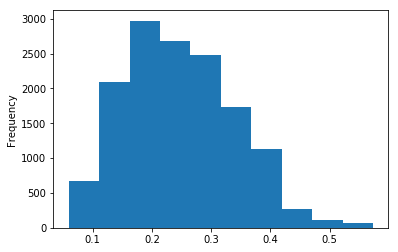

In [29]:
np.sqrt(dataset['Item_Visibility']).plot('hist')


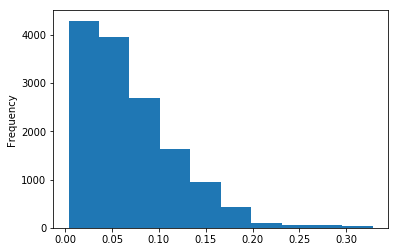

In [30]:
dataset['Item_Visibility'].plot('hist')


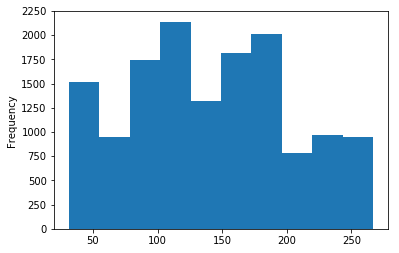

In [31]:
dataset['Item_MRP'].plot('hist')

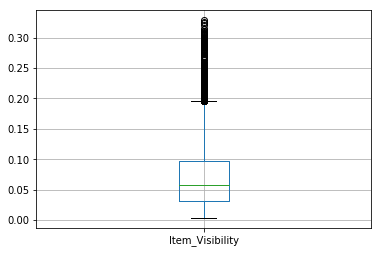

In [32]:
dataset.boxplot("Item_Visibility")

In [33]:
dataset['Item_Visibility'].corr(dataset['Item_Outlet_Sales'])


-0.12845320034149194

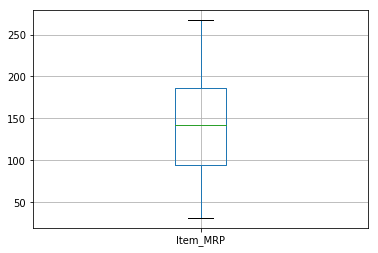

In [34]:
dataset.boxplot('Item_MRP')

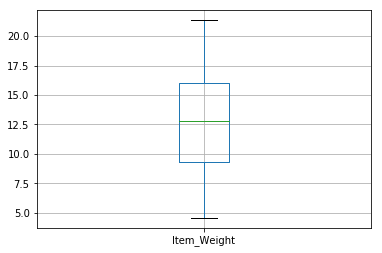

In [35]:
dataset.boxplot('Item_Weight')

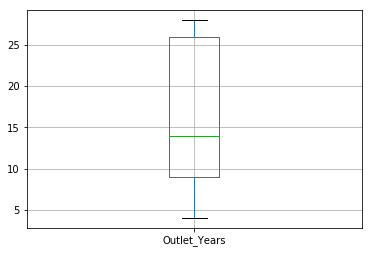

In [36]:
dataset.boxplot('Outlet_Years')

In [37]:
dataset['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT035    1550
OUT046    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [38]:
#Encoding 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label = LabelEncoder()
dataset['Outlet'] = label.fit_transform(dataset['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined',
           'Outlet_Type']
for i in var_mod:
    dataset[i] = label.fit_transform(dataset[i])



In [39]:
dataset.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Combined,Outlet_Years,Outlet
0,0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,0,1,1,train,1,14,9
1,2,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,2,1,2,train,0,4,3
2,0,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,0,1,1,train,1,14,9
3,2,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,2,2,0,train,1,15,0
4,1,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,2,0,1,train,2,26,1


In [40]:
#Creating dummy variables by get_dummies
dataset = pd.get_dummies(dataset, columns = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                                        'Item_Type_Combined','Outlet'])


In [41]:
dataset.head()
print(dataset.shape)

(14204, 36)


In [42]:
#Removing dummies
dataset.drop(['Item_Fat_Content_0','Outlet_Location_Type_0','Outlet_Size_0','Outlet_Type_0','Item_Type_Combined_0','Outlet_0'],axis=1,inplace=True)


In [43]:
print(dataset.shape)

(14204, 30)


In [44]:
#Drop the columns which have been converted to different types
dataset.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)



In [45]:
#Divide into test and train:
train = dataset.loc[dataset['source']=="train"]
test = dataset.loc[dataset['source']=="test"]


In [46]:
test.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,source,Outlet_Years,Item_Fat_Content_1,Item_Fat_Content_2,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
8523,FDW58,107.8622,NaN,0.007565,20.750000,OUT049,test,14,0,0,...,0,0,0,0,0,0,0,0,0,1
8524,FDW14,87.3198,NaN,0.038428,8.300000,OUT017,test,6,0,1,...,0,0,1,0,0,0,0,0,0,0
8525,NCN55,241.7538,NaN,0.099575,14.600000,OUT010,test,15,1,0,...,1,0,0,0,0,0,0,0,0,0
8526,FDQ58,155.0340,NaN,0.015388,7.315000,OUT017,test,6,0,0,...,0,0,1,0,0,0,0,0,0,0
8527,FDY38,234.2300,NaN,0.118599,12.792854,OUT027,test,28,0,1,...,0,0,0,0,0,1,0,0,0,0


In [47]:
train.drop(['source','Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
test.drop(['Item_Outlet_Sales','source','Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)


C:\Users\Sanjeevi\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [48]:
train.head()


,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Years,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,249.8092,3735.1380,0.016047,9.30,14,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,48.2692,443.4228,0.019278,5.92,4,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
2,141.6180,2097.2700,0.016760,17.50,14,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,182.0950,732.3800,0.017834,19.20,15,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,53.8614,994.7052,0.009780,8.93,26,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0


In [49]:
test.head()

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Years,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
8523,107.8622,0.007565,20.750000,14,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8524,87.3198,0.038428,8.300000,6,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8525,241.7538,0.099575,14.600000,15,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
8526,155.0340,0.015388,7.315000,6,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8527,234.2300,0.118599,12.792854,28,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0


In [50]:
#Splitting into X and y
X_main = train.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]].values
X_test = test.iloc[:,0:].values
y_main = train.iloc[:,1].values

In [51]:
print(X_main.shape)
print(X_test.shape)
test.apply(lambda x:sum(x.isnull()))

(8523, 24)
(5681, 24)


Item_MRP                  0
Item_Visibility           0
Item_Weight               0
Outlet_Years              0
Item_Fat_Content_1        0
Item_Fat_Content_2        0
Outlet_Location_Type_1    0
Outlet_Location_Type_2    0
Outlet_Size_1             0
Outlet_Size_2             0
Outlet_Type_1             0
Outlet_Type_2             0
Outlet_Type_3             0
Item_Type_Combined_1      0
Item_Type_Combined_2      0
Outlet_1                  0
Outlet_2                  0
Outlet_3                  0
Outlet_4                  0
Outlet_5                  0
Outlet_6                  0
Outlet_7                  0
Outlet_8                  0
Outlet_9                  0
dtype: int64

In [52]:
#we are splitting datas from training set into train and val to visulaize the errors better
#Since we don't have y values in test set
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_main,y_main,test_size = 0.25,random_state = 0)

In [53]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_val = sc_X.transform(X_val)


In [54]:
#Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
regressor_Linear = LinearRegression()
regressor_Linear.fit(X_train,y_train)
#Applying k-fold
'''from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor_Linear, X = X_train, y = y_train, cv = 10)
accuracies.mean()
'''

'from sklearn.model_selection import cross_val_score\naccuracies = cross_val_score(estimator = regressor_Linear, X = X_train, y = y_train, cv = 10)\naccuracies.mean()\n'

In [55]:
ypred_Linear = regressor_Linear.predict(X_val)

In [56]:
print(regressor_Linear.intercept_)
print(regressor_Linear.coef_)

2179.406259088831
[ 9.65330032e+02 -1.03479218e+01 -1.07792208e+01 -2.71337733e+14
  4.22227489e+14  1.26855588e+01 -8.87877085e+14 -2.24661507e+15
 -1.14017022e+14  8.87836138e+14 -1.86801929e+15  6.75655108e+13
 -4.64427355e+14  1.76641918e+01 -4.22227489e+14  1.87675115e+15
  2.89619246e+14  4.56349289e+14 -1.01473210e+15  1.23158529e+15
  3.15392612e+14  3.37975889e+14 -2.05444047e+14  4.12397150e+14]


In [57]:
#R - squared value for linear
print('R-squared train score: {:.2f}'.format(regressor_Linear.score(X_train,y_train)))
print('R-squared test score: {:.2f}'.format(regressor_Linear.score(X_val,y_val)))

R-squared train score: 0.56
R-squared test score: 0.56


In [58]:
#Root mean squared value
from sklearn.metrics import mean_squared_error
print('Root mean squared error(linear): {:.2f}'.format(np.sqrt(mean_squared_error(y_val,ypred_Linear))))


Root mean squared error(linear): 1146.16


In [83]:
#Applying k-fold cross validation
from sklearn.model_selection import cross_val_score
r_square = cross_val_score(estimator = regressor_Linear, X = X_train, y = y_train, cv = 10)
r_square.mean()

0.5600635147174348

In [59]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
X_poly_val = poly_reg.transform(X_val)
linear_reg = LinearRegression().fit(X_poly,y_train)

In [60]:
ypred_Poly = linear_reg.predict(X_poly_val)

In [61]:
#R-squared value for Polynomial
print('R-squared train score: {:.2f}'.format(linear_reg.score(X_poly,y_train)))
print('R-squared test score: {:.2f}'.format(linear_reg.score(X_poly_val,y_val)))

R-squared train score: 0.62
R-squared test score: 0.59


In [62]:
#Root mean squared value for Polynomial

print('Root mean squared error(Polynomial): {:.2f}'.format(np.sqrt(mean_squared_error(y_val,ypred_Poly))))


Root mean squared error(Polynomial): 1110.73


In [84]:
#Applying k-fold cross validation
from sklearn.model_selection import cross_val_score
r_square = cross_val_score(estimator = linear_reg, X = X_train, y = y_train, cv = 10)
r_square.mean()

0.5600650544935999

In [63]:
#Fitting SVR
from sklearn.svm import SVR
regressor_svr = SVR(C = 800, kernel = 'rbf',gamma = 0.1).fit(X_train,y_train)
ypred_SVR = regressor_svr.predict(X_val)

In [64]:
#R-squared and rms value for SVR
print('R-squared train score: {:.2f}'.format(regressor_svr.score(X_train,y_train)))
print('R-squared test score: {:.2f}'.format(regressor_svr.score(X_val,y_val)))
print('Root mean squared error(SVR): {:.2f}'.format(np.sqrt(mean_squared_error(y_val,ypred_SVR))))

R-squared train score: 0.61
R-squared test score: 0.58
Root mean squared error(SVR): 1118.67


In [85]:
#Applying k-fold cross validation
from sklearn.model_selection import cross_val_score
r_square = cross_val_score(estimator = regressor_svr, X = X_train, y = y_train, cv = 10)
r_square.mean()

0.5789313655680279

In [65]:
#Grid Search
'''from sklearn.model_selection import GridSearchCV
parameters = [{'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[800,900,1000,1100,1200], 'kernel':['rbf'],'gamma': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
               'epsilon':[0.1,0.2,0.3,0.4,0.5]}]
grid_search = GridSearchCV(estimator = regressor_svr,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)'''

"from sklearn.model_selection import GridSearchCV\nparameters = [{'C':[1,10,100,1000],'kernel':['linear']},\n              {'C':[800,900,1000,1100,1200], 'kernel':['rbf'],'gamma': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],\n               'epsilon':[0.1,0.2,0.3,0.4,0.5]}]\ngrid_search = GridSearchCV(estimator = regressor_svr,\n                           param_grid = parameters,\n                           scoring = 'r2',\n                           cv = 10,\n                           n_jobs = -1)\ngrid_search = grid_search.fit(X_train, y_train)\nbest_accuracy = grid_search.best_score_\nbest_parameters = grid_search.best_params_\nprint(best_accuracy)\nprint(best_parameters)"

In [66]:
#Random Parameter search
'''from sklearn.model_selection  import RandomizedSearchCV
params = {'C':[800,900,1000,1100,1200],'kernel':['rbf'],'gamma':[3,4,5,6,7,2]}
rsearch = RandomizedSearchCV(estimator = regressor_svr,
                            param_distributions = params,
                            scoring = 'r2',
                            cv = 10,
                            n_jobs = -1)
rsearch = rsearch.fit(X_train, y_train)
best_accuracy = rsearch.best_score_
best_parameters = rsearch.best_params_
print(best_accuracy)
print(best_parameters)'''

"from sklearn.model_selection  import RandomizedSearchCV\nparams = {'C':[800,900,1000,1100,1200],'kernel':['rbf'],'gamma':[3,4,5,6,7,2]}\nrsearch = RandomizedSearchCV(estimator = regressor_svr,\n                            param_distributions = params,\n                            scoring = 'r2',\n                            cv = 10,\n                            n_jobs = -1)\nrsearch = rsearch.fit(X_train, y_train)\nbest_accuracy = rsearch.best_score_\nbest_parameters = rsearch.best_params_\nprint(best_accuracy)\nprint(best_parameters)"

In [67]:
#KNN Regression
from sklearn.neighbors import KNeighborsRegressor
regression_KNN = KNeighborsRegressor(n_neighbors = 29).fit(X_train,y_train)
ypred_KNN = regression_KNN.predict(X_val)


In [68]:
#R-squared and rms value for KNN Regression
print('R-squared train score: {:.2f}'.format(regression_KNN.score(X_train,y_train)))
print('R-squared test score: {:.2f}'.format(regression_KNN.score(X_val,y_val)))
print('Root mean squared error(KNN): {:.2f}'.format(np.sqrt(mean_squared_error(y_val,ypred_KNN))))

R-squared train score: 0.59
R-squared test score: 0.56
Root mean squared error(KNN): 1141.67


In [87]:
#Applying k-fold cross validation
from sklearn.model_selection import cross_val_score
r_square = cross_val_score(estimator = regression_KNN, X = X_train, y = y_train, cv = 10)
r_square.mean()

0.5551494434510201

In [88]:
#Grid Search
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[25,26,27,28,29,30]}
grid_search = GridSearchCV(estimator = regression_KNN,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_r2 = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_r2)
print(best_parameters)

0.5563869012562548
{'n_neighbors': 25}


In [69]:
#Decision Trees
from sklearn.tree import DecisionTreeRegressor
regressor_DT = DecisionTreeRegressor(max_depth = 5).fit(X_train,y_train)
ypred_DT = regressor_DT.predict(X_val)


In [70]:
#R-squared and rms value for Decision Tree
print('R-squared train score: {:.2f}'.format(regressor_DT.score(X_train,y_train)))
print('R-squared test score: {:.2f}'.format(regressor_DT.score(X_val,y_val)))
print('Root mean squared error(Decision Tree): {:.2f}'.format(np.sqrt(mean_squared_error(y_val,ypred_DT))))

R-squared train score: 0.61
R-squared test score: 0.58
Root mean squared error(Decision Tree): 1117.54


In [89]:
#Applying k-fold cross validation
from sklearn.model_selection import cross_val_score
r_square = cross_val_score(estimator = regressor_DT, X = X_train, y = y_train, cv = 10)
r_square.mean()

0.5846100738584316

In [71]:
#Grid Search
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9]}
grid_search = GridSearchCV(estimator = regressor_DT,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)

0.5846151098863311
{'max_depth': 5}


In [72]:
#Fitting Random Forest
from sklearn.ensemble import RandomForestRegressor
regressor_RF = RandomForestRegressor(n_estimators = 14,max_depth = 5).fit(X_train,y_train)
ypred_RF = regressor_RF.predict(X_val)

In [73]:
#R-squared and rms value for Random Forest
print('R-squared train score: {:.2f}'.format(regressor_RF.score(X_train,y_train)))
print('R-squared test score: {:.2f}'.format(regressor_RF.score(X_val,y_val)))
print('Root mean squared error(Random Forest): {:.2f}'.format(np.sqrt(mean_squared_error(y_val, ypred_RF))))

R-squared train score: 0.61
R-squared test score: 0.59
Root mean squared error(Random Forest): 1112.42


In [90]:
#Applying k-fold cross validation
from sklearn.model_selection import cross_val_score
r_square = cross_val_score(estimator = regressor_RF, X = X_train, y = y_train, cv = 10)
r_square.mean()

0.5904980991530392

In [74]:
#Grid Search
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[11,12,13,14,15,16,17],'max_depth' : [4,5,6,7,8]}
grid_search = GridSearchCV(estimator = regressor_RF,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)

0.5954894405638949
{'max_depth': 6, 'n_estimators': 15}


In [75]:
#Fitting Extra Trees Regression
from sklearn.ensemble import ExtraTreesRegressor
regressor_ETR = ExtraTreesRegressor(n_estimators = 350,max_depth = 6).fit(X_train,y_train)
ypred_ETR = regressor_ETR.predict(X_val)

In [76]:
#R-squared and rms value for Extra Tree
print('R-squared train score: {:.2f}'.format(regressor_ETR.score(X_train,y_train)))
print('R-squared test score: {:.2f}'.format(regressor_ETR.score(X_val,y_val)))
print('Root mean squared error(Extra Tree): {:.2f}'.format(np.sqrt(mean_squared_error(y_val,ypred_ETR))))

R-squared train score: 0.62
R-squared test score: 0.60
Root mean squared error(Extra Tree): 1093.89


In [92]:
#Applying k-fold cross validation
from sklearn.model_selection import cross_val_score
r_square = cross_val_score(estimator = regressor_ETR, X = X_train, y = y_train, cv = 10)
r_square.mean()

0.5971748238975971

In [77]:
#Grid Search
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[150,200,250,300,350,400],'max_depth' : [4,5,6,7,8]}
grid_search = GridSearchCV(estimator = regressor_ETR,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)

0.5976714890277665
{'max_depth': 6, 'n_estimators': 400}


In [78]:
#Ridge Regression
from sklearn.linear_model import Ridge
linear_Ridge = Ridge().fit(X_train,y_train)
ypred_Ridge = linear_Ridge.predict(X_val)

In [79]:
#R-squared and rms value for Ridge Regression
print('R-squared train score: {:.2f}'.format(linear_Ridge.score(X_train,y_train)))
print('R-squared test score: {:.2f}'.format(linear_Ridge.score(X_val,y_val)))
print('Root mean squared error(Ridge): {:.2f}'.format(np.sqrt(mean_squared_error(y_val,ypred_Ridge))))

R-squared train score: 0.56
R-squared test score: 0.56
Root mean squared error(Ridge): 1146.24


In [93]:
#Applying k-fold cross validation
from sklearn.model_selection import cross_val_score
r_square = cross_val_score(estimator = linear_Ridge, X = X_train, y = y_train, cv = 10)
r_square.mean()

0.5601033931919105

In [80]:
#Lasso Regression
from sklearn.linear_model import Lasso
linear_Lasso = Lasso(alpha = 5).fit(X_train,y_train)
ypred_Lasso = linear_Lasso.predict(X_val)

In [81]:
#R-squared and rms value for Lasso Regression
print('R-squared train score: {:.2f}'.format(linear_Lasso.score(X_train,y_train)))
print('R-squared test score: {:.2f}'.format(linear_Lasso.score(X_val,y_val)))
print('Root mean squared error(Lasso): {:.2f}'.format(np.sqrt(mean_squared_error(y_val,ypred_Lasso))))

R-squared train score: 0.56
R-squared test score: 0.56
Root mean squared error(Lasso): 1147.10


In [94]:
#Applying k-fold cross validation
from sklearn.model_selection import cross_val_score
r_square = cross_val_score(estimator = linear_Lasso, X = X_train, y = y_train, cv = 10)
r_square.mean()

0.5601200490486659

In [82]:
#Grid Search
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[5,10,15,20,25]}
grid_search = GridSearchCV(estimator = linear_Lasso,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)

0.5601203249136473
{'alpha': 5}
